In [219]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Problem 1


In [220]:
df = pd.read_csv('prob1.txt', sep='\s+', names=['y', 'x1', 'x2', 'x3'])
#df.drop(columns=['Unnamed: 0'], inplace=True)
df

,y,x1,x2,x3
0,12.85,5.6,5.6,3.8
1,11.55,4.1,4.8,4.8
2,12.78,3.7,3.5,3.6
3,11.19,4.8,4.5,5.2
4,9.00,3.4,3.7,2.9
5,9.34,6.1,5.8,3.4
6,13.80,7.7,7.2,3.8
7,8.79,4.0,4.0,3.8
8,8.54,2.8,2.3,2.9
9,6.23,3.2,3.0,2.8


In [221]:
X = df[['x1', 'x2', 'x3']]
Y = df['y']
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     38.28
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           7.82e-12
Time:                        16:32:18   Log-Likelihood:                -86.816
No. Observations:                  44   AIC:                             181.6
Df Residuals:                      40   BIC:                             188.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0233      1.203      0.851      0.4

In [222]:
import numpy.linalg as linalg

XtX = X.T.dot(X)
inv_XtX = linalg.inv(XtX)
inv_XtXXt = inv_XtX.dot(X.T)
beta_hat = inv_XtXXt.dot(Y)
hat_matrix = X.dot(inv_XtX.dot(X.T))
b = np.matmul(inv_XtXXt, Y)
J = np.ones((len(Y), len(Y)))
print(b)

[1.02325133 0.96569022 0.62916438 0.67602464]


# a. Obtain the three variance inflation factors. What do these suggest about the effects of multicollinearity here?


In [223]:
X1_regressed = df[['x2', 'x3']]
Y_x1r = df['x1']
X1_regressed = sm.add_constant(X1_regressed) 
model = sm.OLS(Y_x1r, X1_regressed).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     391.0
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           1.98e-27
Time:                        16:32:18   Log-Likelihood:                -20.779
No. Observations:                  44   AIC:                             47.56
Df Residuals:                      41   BIC:                             52.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0651      0.265      0.246      0.8

In [224]:
X2_regressed = df[['x1', 'x3']]
Y_x2r = df['x2']
X2_regressed = sm.add_constant(X2_regressed) 
model = sm.OLS(Y_x2r, X2_regressed).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     x2   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     404.2
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           1.04e-27
Time:                        16:32:18   Log-Likelihood:                -16.689
No. Observations:                  44   AIC:                             39.38
Df Residuals:                      41   BIC:                             44.73
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0095      0.241     -0.039      0.9

In [225]:
X3_regressed = df[['x2', 'x1']]
Y_x3r = df['x3']
X3_regressed = sm.add_constant(X3_regressed) 
model = sm.OLS(Y_x3r, X3_regressed).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     x3   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     4.468
Date:                Sat, 29 Mar 2025   Prob (F-statistic):             0.0176
Time:                        16:32:18   Log-Likelihood:                -51.137
No. Observations:                  44   AIC:                             108.3
Df Residuals:                      41   BIC:                             113.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7908      0.298      9.360      0.0

In [226]:
R1 = 0.950
R2 = 0.952
R3 = 0.179
VIF1 = 1/(1-R1)
VIF2 = 1/(1-R2)
VIF3 = 1/(1-R3)
print(f"VIF1: {VIF1}, VIF2: {VIF2}, VIF3: {VIF3}")

VIF1: 19.999999999999982, VIF2: 20.833333333333314, VIF3: 1.218026796589525


In [227]:
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

  Variable        VIF
0    const  19.105925
1       x1  20.072031
2       x2  20.716101
3       x3   1.217973


There is evidence of serious multicolinearity in this model, probably we have some redundant in the predictors
# b. The assistant eventually decided to drop variables X2 and X3 from the model “to clear up the picture.” Fit the assistant’s revised model. Is the assistant now in a better position to achieve the research objective?


In [228]:
revised_X = df[['x1']]
revised_X = sm.add_constant(revised_X)
revised_model = sm.OLS(Y, revised_X).fit()
print(revised_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     102.1
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           8.23e-13
Time:                        16:32:18   Log-Likelihood:                -89.472
No. Observations:                  44   AIC:                             182.9
Df Residuals:                      42   BIC:                             186.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1628      0.671      4.712      0.0

It is not sure that the assistant is in a better position to achieve the research objective. It seems that this model is better than the full model (smaller p-value, the CI does not contain 0)
# c. Why would an experiment here be more effective in providing suitable data to meet the research objective? How would you design such an experiment? What regression model would you employ?
The experiment here be more effective in providing suitable data to meet the research objective as it help us remove the possibly redundant or colinear values that make our model biased  
Choose whether x2 or x3, should include the population of the city to the dataset as each territories may have different number of people that may affect the bias of data

# Problem 2

In [229]:
df = pd.read_csv('prob52.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,temp,vapor
0,273,4.6
1,283,9.2
2,293,17.5
3,303,31.8
4,313,55.3
5,323,92.5
6,333,149.4
7,343,233.7
8,353,355.1
9,363,525.8


# a. Plot a scatter diagram. Does it seem likely that a straight-line model will be adequate?



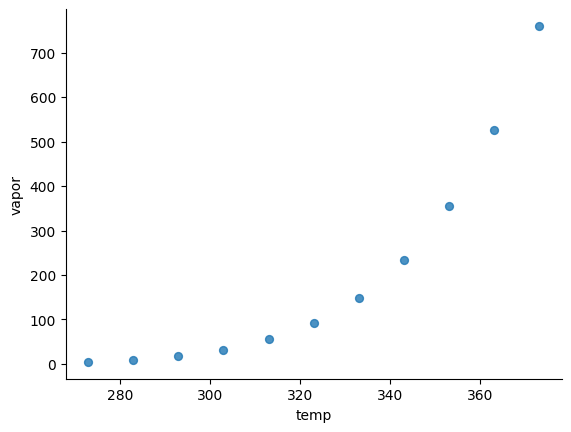

In [230]:
df.plot(kind='scatter', x='temp', y='vapor', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

The straight-line may not be adequate as there are some outliers that fall apart
# b. Fit the straight-line model. Compute the summary statistics and the residual plots. What are your conclusions regarding model adequacy?


In [231]:
X = df[['temp']]
Y = df['vapor']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  vapor   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     35.57
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           0.000212
Time:                        16:32:18   Log-Likelihood:                -66.942
No. Observations:                  11   AIC:                             137.9
Df Residuals:                       9   BIC:                             138.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1956.2585    363.807     -5.377      0.0

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


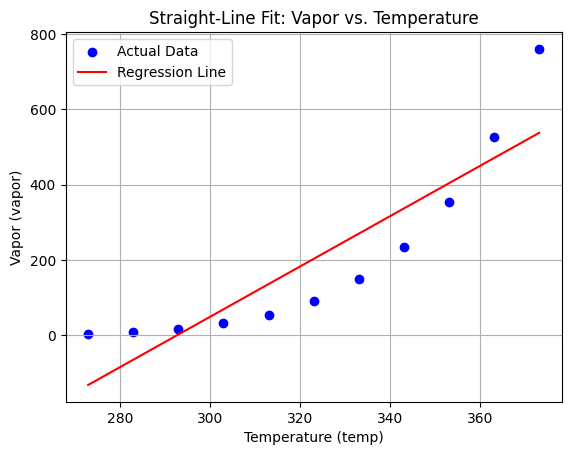

In [232]:
predicted = model.predict(X)

plt.scatter(df['temp'], df['vapor'], color='blue', label='Actual Data')
plt.plot(df['temp'], predicted, color='red', label='Regression Line')
plt.title('Straight-Line Fit: Vapor vs. Temperature')
plt.xlabel('Temperature (temp)')
plt.ylabel('Vapor (vapor)')
plt.legend()
plt.grid(True)
plt.show()

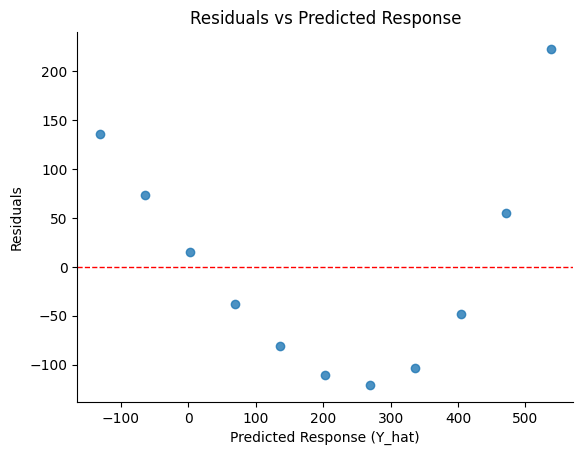

In [233]:
Y_hat = -1956.2585 + 6.6855*df['temp']
residuals = Y - Y_hat

plt.scatter(Y_hat, residuals, alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel("Predicted Response (Y_hat)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Response")
plt.gca().spines[['top', 'right',]].set_visible(False)

The residuals do not appear randomly scattered around zero. Instead, they form a parabolic shape, suggesting a non-linear relationship between the predictors and the response variable
# c. From physical chemistry the Clausius-Clapeyron equation states that 𝑙n(pv)oo − 1/𝑇. Repeat part b using the appropriate transformation based on this information.

In [234]:
df['ln_vapor'] = np.log(df['vapor'])
df['inv_temp'] = 1 / df['temp']

X_transformed = df[['inv_temp']]
Y_transformed = df['ln_vapor']
X_transformed = sm.add_constant(X_transformed)
transformed_model = sm.OLS(Y_transformed, X_transformed).fit()

print(transformed_model.summary())


                            OLS Regression Results                            
Dep. Variable:               ln_vapor   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.672e+04
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           9.95e-19
Time:                        16:32:19   Log-Likelihood:                 28.164
No. Observations:                  11   AIC:                            -52.33
Df Residuals:                       9   BIC:                            -51.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6074      0.063    325.790      0.0

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


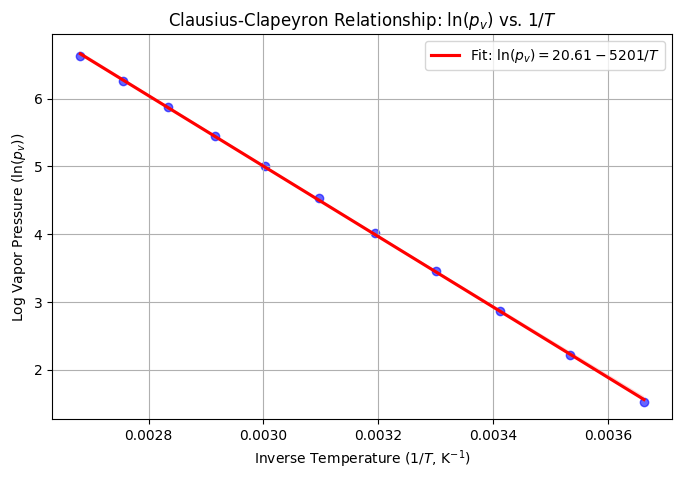

In [235]:
plt.figure(figsize=(8, 5))
sns.regplot(x='inv_temp', y='ln_vapor', data=df,
            scatter_kws={'color': 'blue', 'alpha': 0.6},
            line_kws={'color': 'red', 'label': f'Fit: $\\ln(p_v) = {20.6074:.2f} - {5200.76:.0f}/T$'})
plt.title('Clausius-Clapeyron Relationship: $\\ln(p_v)$ vs. $1/T$')
plt.xlabel('Inverse Temperature ($1/T$, K$^{-1}$)')
plt.ylabel('Log Vapor Pressure ($\\ln(p_v)$)')
plt.legend()
plt.grid(True)
plt.show()

The transformation helps the model better fitted
# Problem 3

In [236]:
df = pd.read_csv('tableb8.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,x1,x2,y
0,0.00,10,7.5
1,0.00,50,15.0
2,0.00,85,22.0
3,0.00,110,28.6
4,0.00,140,31.6
5,0.00,170,34.0
6,0.00,200,35.0
7,0.00,230,35.5
8,0.00,260,36.5
9,0.00,290,38.5


In [237]:
X = df[['x1', 'x2']]
Y = df['y']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     87.60
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           6.32e-14
Time:                        16:32:19   Log-Likelihood:                -105.85
No. Observations:                  36   AIC:                             217.7
Df Residuals:                      33   BIC:                             222.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0870      1.669      6.642      0.0

# a. Perform a thorough residual analysis of these data.


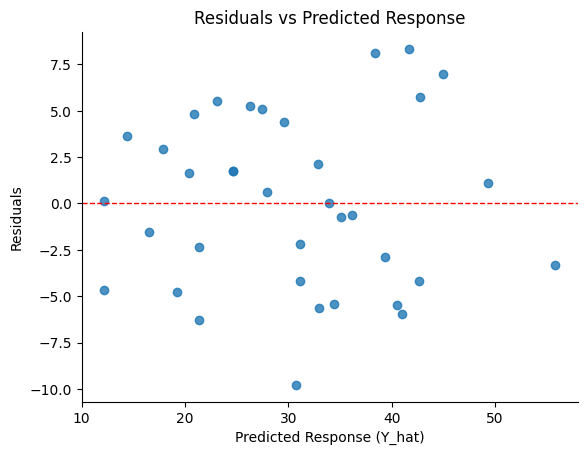

In [238]:
Y_hat = 11.0870 + 350.1192*df['x1'] + 0.1089*df['x2']
residuals = Y - Y_hat

plt.scatter(Y_hat, residuals, alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel("Predicted Response (Y_hat)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Response")
plt.gca().spines[['top', 'right',]].set_visible(False)

The residuals line randomly, showcasing the linear model is adequate

          x1        x2         y
x1  1.000000 -0.127539  0.519254
x2 -0.127539  1.000000  0.683825
y   0.519254  0.683825  1.000000


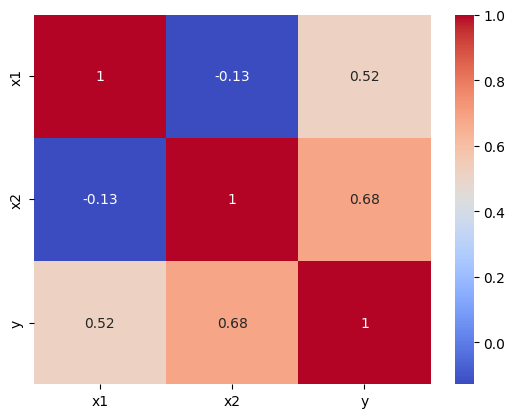

In [239]:
# Calculate and display the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix);

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show();


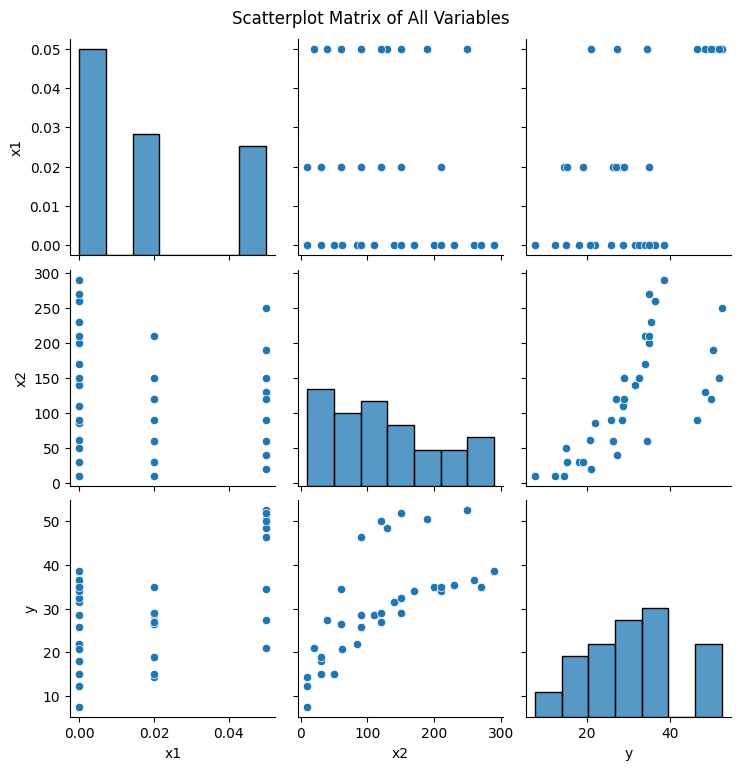

In [240]:
sns.pairplot(df)
plt.suptitle('Scatterplot Matrix of All Variables', y=1.02)
plt.show()

y|x1 is linear
y|x2 is non-linear, the data plot is quite similar to the plot of y = logx so I think we should transform x2' = logx2 and y' = y**1/2
# b. Identify the most appropriate transformation for these data. Fit this model and repeat the residual analysis.

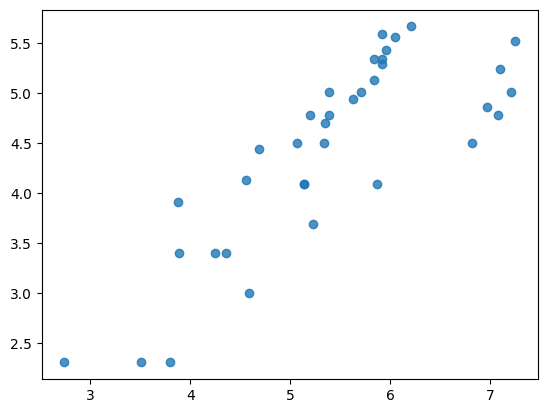

In [241]:
X_transformed = np.log(df['x2'])
Y_transformed = df['y']**(1/2)

plt.scatter(Y_transformed, X_transformed, alpha=0.8)

In [242]:
Xt = pd.concat([df['x1'],X_transformed, Y_transformed], axis = 1)
Xt = sm.add_constant(Xt)
Xt.head()

,const,x1,x2,y
0,1.0,0.0,2.302585,2.738613
1,1.0,0.0,3.912023,3.872983
2,1.0,0.0,4.442651,4.690416
3,1.0,0.0,4.700480,5.347897
4,1.0,0.0,4.941642,5.621388


       const        x1        x2         y
const    NaN       NaN       NaN       NaN
x1       NaN  1.000000 -0.030614  0.481206
x2       NaN -0.030614  1.000000  0.810772
y        NaN  0.481206  0.810772  1.000000


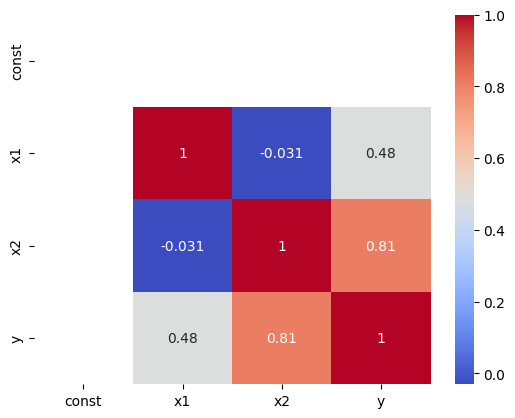

In [243]:
# Calculate and display the correlation matrix
numeric_df = Xt.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix);

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show();


The new transform x2' = logx2 and y' = y**(1/2) better fitted